# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import sys
sys.path.insert(1, 'scripts/')  # TODO: insert at 1, 0 is the script path (or '' in REPL)

from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from d4pg_agent import D4PG_Agent
from params import Params
from logger import Logger

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [13]:
env = UnityEnvironment(file_name='Reacher_Windows_multi_agent_x86_64/Reacher.exe')
#env = UnityEnvironment(file_name='Reacher_Windows_single_agent_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [14]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [15]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [16]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [17]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [18]:
def d4pg(params=Params(), logger=Logger()):
    
    env_info = env.reset(train_mode=True)[brain_name]
    
    for i_episode in range(1, params.n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        states = env_info.vector_observations              # get the current state
        agent.reset()
        score = 0
                
        for t in range(params.max_t):                             
            
            # Perform actions from each agent's policy network (clipped actions [0, -1])
            actions = [ agent.act(state) for state in states ]  
            actions = np.stack(actions)            
            env_info = env.step(actions)[brain_name]      
            next_states, rewards, dones = env_info.vector_observations, env_info.rewards, env_info.local_done
            
            agent.step(states, actions, rewards, next_states, dones, clear_nstep_buffer=(t==0))
               
            states = next_states
            score += (sum(rewards) / len(rewards))  # ALT METRIC: Max
            
            # Prevent agent from learning NaN rewards
            has_NAN_in_rewards = np.isnan(rewards)
            if any(has_NAN_in_rewards):
                rewards[has_NAN_in_rewards] = -5
                print("NaN Reward Found! Converting to R=-5 instead...")
            
            # Break if any of the agent is done
            if any(dones):
                break 
            
        # Print crucial results for progress tracking
        if agent.memory_buffer_prefilled():
            
            logger.scores_deque.append(score)
            logger.actor_loss_deque.append(agent.actor_loss)
            logger.critic_loss_deque.append(agent.critic_loss)
            logger.scores_list.append(score)
            logger.actor_loss_list.append(agent.actor_loss)
            logger.critic_loss_list.append(agent.critic_loss)
            
            print('\rEpisode {}\ Score: {:.2f}'.format(i_episode, logger.scores_deque[-1]), end="")

            if i_episode % params.save_every == 0:
                torch.save(agent.actor_local.state_dict(), "weights/checkpoint_actor/checkpoint_actor_ep{}.pth".format(i_episode))
                torch.save(agent.critic_local.state_dict(), "weights/checkpoint_critic/checkpoint_critic_ep{}.pth".format(i_episode))

            if i_episode % params.print_every == 0:
                print('\rEpisode {}: \tActor Loss: {:.2f}\n\tAverage Score: {:.2f}'.format(i_episode, np.mean(logger.actor_loss_deque), np.mean(logger.scores_deque)))

                if np.mean(logger.scores_deque) >= target_score:
                    print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'
                          .format(i_episode, np.mean(logger.scores_deque)))
                    torch.save(agent.actor_local.state_dict(), "weights/checkpoint_actor/checkpoint_actor_ep{}.pth".format(i_episode))
                    torch.save(agent.critic_local.state_dict(), "weights/checkpoint_critic/checkpoint_critic_ep{}.pth".format(i_episode))
                    if params.terminate_on_target_score:
                        break

    # Plot graphs for scores & losses
    if params.plot_stats:
        logger.plot_stats()
        
    return logger.scores_list


=============== NETWORKS ===============
actor_local Actor(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=4, bias=True)
)
actor_target Actor(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=4, bias=True)
)
critic_local Critic(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=404, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=100, bias=True)
)
critic_target Critic(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=404, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=100, bias=True)
)

=============== HYPERPARAMS ===============
DEVICE:  cuda:0
RANDOM SEED:  0
BUFFER_SIZE:  300000
BATCH_SIZE:  128
GAMMA:  0.99
TAU:

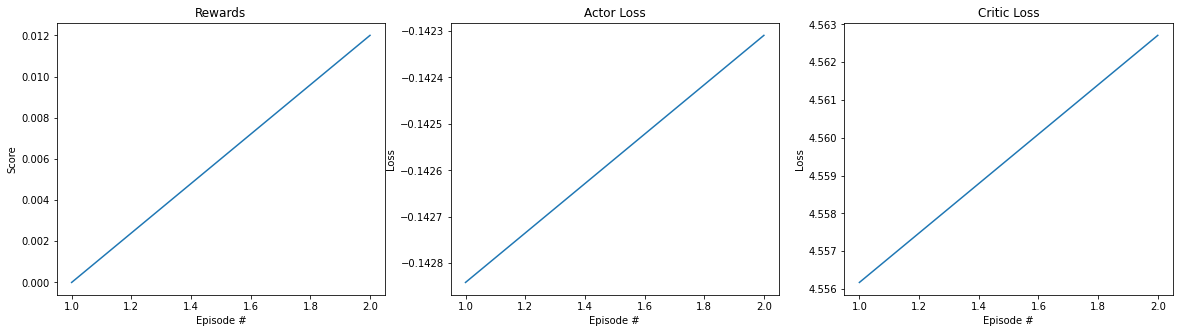

[0.0, 0.011999999731779096]

In [19]:
# Params Override: Initialized in params.py
params = Params()
params.verbose = True
params.random_seed = 0
params.n_episodes=300
params.max_t = 1000
params.print_every = 20
params.save_every = 100
params.prefill_memory_qty=5000
params.terminate_on_target_score = False
params.plot_stats = True
params.lr_actor = 5e-4                  
params.lr_critic = 1e-3                

#### MAIN #####
logger = Logger()
agent = D4PG_Agent(state_size, action_size, params=params)
d4pg(params, logger)

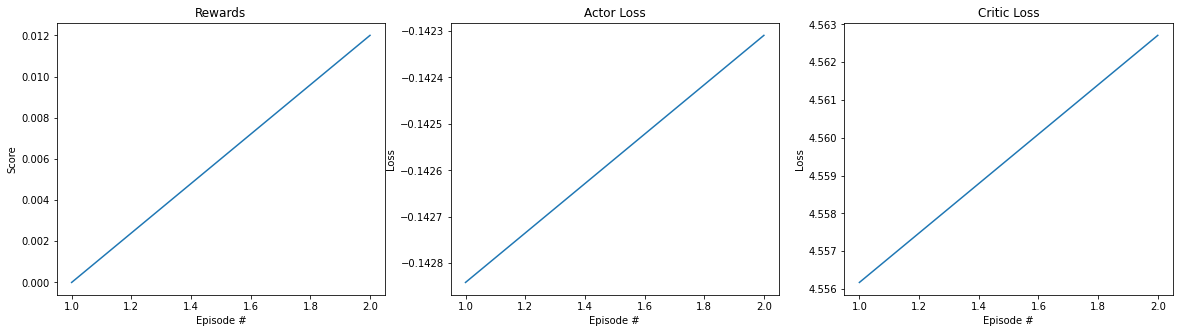

In [20]:
def plot_graph(logger):
    
    _, axs = plt.subplots(1, 3, figsize=(20, 5))

    # Scores
    axs[0].plot(np.arange(1, len(logger.scores_list)+1), logger.scores_list)
    axs[0].set(xlabel='Episode #', ylabel='Score')
    axs[0].set_title('Rewards')
        
    # Actor Loss
    axs[1].plot(np.arange(1, len(logger.actor_loss_list)+1), logger.actor_loss_list)
    axs[1].set(xlabel='Episode #', ylabel='Loss')
    axs[1].set_title('Actor Loss')
    
    # Critic Loss
    axs[2].plot(np.arange(1, len(logger.critic_loss_list)+1), logger.critic_loss_list)
    axs[2].set(xlabel='Episode #', ylabel='Loss')
    axs[2].set_title('Critic Loss')
    plt.show()
    
plot_graph(logger)

In [21]:
# ########################################################################################
# # PARAMETER SWEEP: VARYING HARD UPDATE RATES
# ########################################################################################

# print("CUDA AVAILABLE: ", torch.cuda.is_available())

# ##################
# scores = []
# args = Params()
# args.lr_actor = 1e-4
# args.lr_critic = 1e-4
# args.hard_weights_update_every = 350
# agent = D4PG_Agent(state_size, action_size, random_seed=0, params=args)
# d4pg(scores, n_episodes=50, max_t=1000, print_every=2, save_every=100, target_score=30.0, N_step_bootstrap=5, prefill_memory_qty=5000)
# plot_graph(scores)

# ##################
# scores = []
# args = Params()
# args.lr_actor = 1e-4
# args.lr_critic = 4e-4
# args.hard_weights_update_every = 350
# agent = D4PG_Agent(state_size, action_size, random_seed=0, params=args)
# d4pg(scores, n_episodes=50, max_t=1000, print_every=2, save_every=100, target_score=30.0, N_step_bootstrap=5, prefill_memory_qty=5000)
# plot_graph(scores)

# ##################
# scores = []
# args = Params()
# args.lr_actor = 5e-4
# args.lr_critic = 5e-4
# args.hard_weights_update_every = 350
# agent = D4PG_Agent(state_size, action_size, random_seed=0, params=args)
# d4pg(scores, n_episodes=50, max_t=1000, print_every=2, save_every=100, target_score=30.0, N_step_bootstrap=5, prefill_memory_qty=5000)
# plot_graph(scores)

# ##################
# scores = []
# args = Params()
# args.lr_actor = 5e-4
# args.lr_critic = 7.5e-4
# args.hard_weights_update_every = 350
# agent = D4PG_Agent(state_size, action_size, random_seed=0, params=args)
# d4pg(scores, n_episodes=50, max_t=1000, print_every=2, save_every=100, target_score=30.0, N_step_bootstrap=5, prefill_memory_qty=5000)
# plot_graph(scores)

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [22]:
# # load the weights from file
# agent = D4PG_Agent(state_size, action_size, random_seed=1)
# agent.actor_local.load_state_dict(torch.load('weights/saved/actor_v1.pth'))
# agent.critic_local.load_state_dict(torch.load('weights/saved/critic_v1.pt'))


# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment
# states = env_info.vector_observations                # get the current state
# score = 0                                              # initialize the score
# while True:
#     # Perform actions from each agent's policy network (clipped actions [0, -1])
#     actions = [ agent.act(state, add_noise=False) for state in states ]  
#     actions = np.stack(actions)      
#     env_info = env.step(actions)[brain_name]  # send the action to the environment (BUG: Cast action to int)
#     next_states = env_info.vector_observations       # get the next state
#     rewards = env_info.rewards                       # get the reward
#     dones = env_info.local_done                      # see if episode has finished
#     score += max(rewards)                                    # update the score
#     states = next_states                                 # roll over the state to next time step
#     if any(dones):                                           # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [23]:
# env.close()